<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Analisis_Multivariado/Analisis_exploratorio_factorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

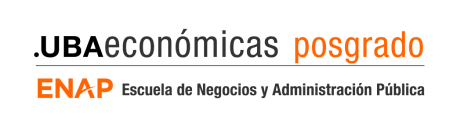

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Métodos de Análisis Multivariado - Análisis Factorial Exploratorio

- Silvia VIETRI
- Silvina DEL DUCA

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


#### Instalando paquetes

In [2]:
install.packages("lavaan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’, ‘pbivnorm’, ‘numDeriv’




In [7]:
install.packages("semPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘OpenMx’, ‘regsem’




In [9]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages("GPArotation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
install.packages("nFactors")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Habilitando librerias

In [15]:
library(base)
library(lavaan)
library(semPlot)
library(ggplot2)
library(psych)
library(GPArotation)
library(Matrix)
library(nFactors)

In [16]:
r <- c(1.000,
        .439,1.000,
        .410,.351,1.000,
        .288,.354,.164,1.000,
        .329,.320,.190,.595,1.000,
        .248,.329,.181,.470,.464,1.000)

In [17]:
R <- lav_matrix_lower2full(r)

#### Etiquetando las variables de la matriz

In [18]:
colnames(R) <- rownames (R) <- c("Lit", "Ing", "His","Ari","Alg","Geo")

#### Descomposición en autovalores y autovectores

In [19]:
auto <- svd(R)

In [20]:
av <- Diagonal(6,auto$d)

In [21]:
LAMBDA = auto$u * sqrt(av)

#### Estimacion EFA componentes principales

In [22]:
fit.pca <- principal(R, nfactors = 2, rotate = "none", nobs = 220)

In [23]:
print(fit.pca)

Principal Components Analysis
Call: principal(r = R, nfactors = 2, rotate = "none", nobs = 220)
Standardized loadings (pattern matrix) based upon correlation matrix
     PC1   PC2   h2   u2 com
Lit 0.66  0.45 0.63 0.37 1.8
Ing 0.69  0.29 0.56 0.44 1.3
His 0.52  0.64 0.67 0.33 1.9
Ari 0.74 -0.41 0.72 0.28 1.6
Alg 0.74 -0.38 0.69 0.31 1.5
Geo 0.68 -0.36 0.59 0.41 1.5

                       PC1  PC2
SS loadings           2.73 1.13
Proportion Var        0.46 0.19
Cumulative Var        0.46 0.64
Proportion Explained  0.71 0.29
Cumulative Proportion 0.71 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.11 

Fit based upon off diagonal values = 0.9

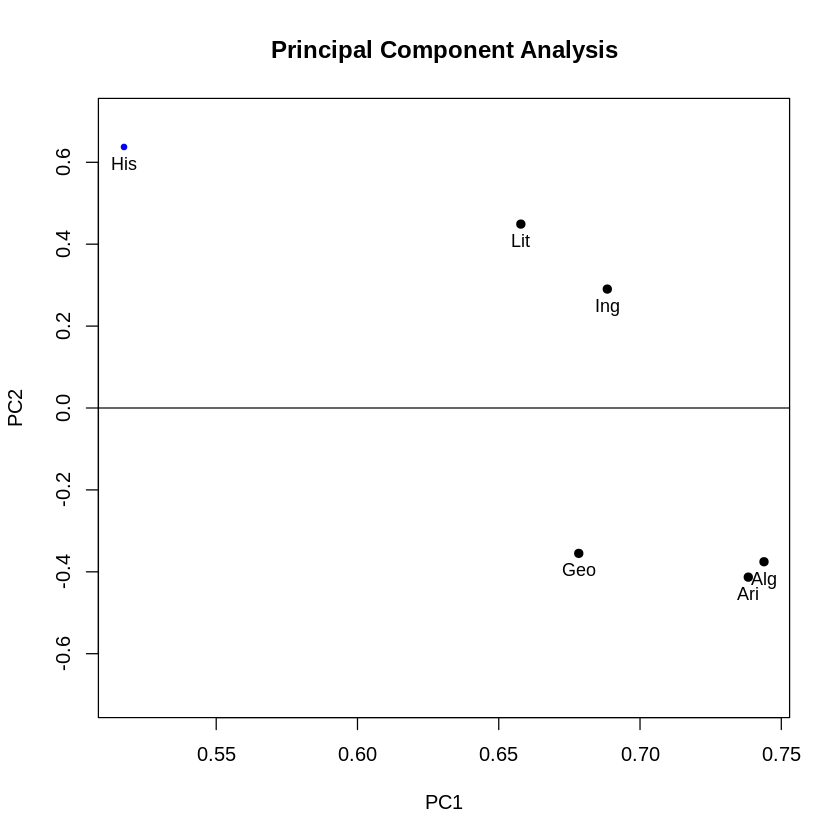

In [26]:
plot(fit.pca, labels = row.names(R), cex = .9, ylim = c(-.7,.7))

#### Estimación EFA ejes principales

In [27]:
fit.pa <- fa(R, nfactors = 2, fm = "pa", rotate = "none", n.obs = 220)

In [28]:
print(fit.pa)

Factor Analysis using method =  pa
Call: fa(r = R, nfactors = 2, n.obs = 220, rotate = "none", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
     PA1   PA2   h2   u2 com
Lit 0.59  0.38 0.49 0.51 1.7
Ing 0.59  0.24 0.41 0.59 1.3
His 0.43  0.41 0.36 0.64 2.0
Ari 0.71 -0.33 0.62 0.38 1.4
Alg 0.70 -0.28 0.57 0.43 1.3
Geo 0.58 -0.18 0.38 0.62 1.2

                       PA1  PA2
SS loadings           2.22 0.59
Proportion Var        0.37 0.10
Cumulative Var        0.37 0.47
Proportion Explained  0.79 0.21
Cumulative Proportion 0.79 1.00

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  1.44 with Chi Square of  310.84
The degrees of freedom for the model are 4  and the objective function was  0.01 

The root mean square of the residuals (RMSR) is  0.01 
The df corrected root mean square of the residuals is  0.03 

The harmonic number of observa

#### Determinación del número de factores

In [72]:
nBartlett(R, N = 220, alpha = 0.01, cor = TRUE, details = TRUE)

v,values,bartlett,bartlett.chi,bartlett.df,bartlett.p,anderson.chi,anderson.df,anderson.p,lawley.chi,lawley.df,lawley.p
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.7328841,0.2374095,310.840887,15,3.110695e-57,316.353100,20,3.652425e-55,310.840887,15,3.110695e-57
2,1.1297704,0.7292967,68.027886,14,4.382962e-09,69.448422,14,2.428840e-09,68.039639,10,1.058345e-10
3,0.6151739,0.9432521,12.550937,9,1.840005e-01,12.852783,9,1.693816e-01,12.556961,6,5.063648e-02
4,0.6012219,0.9568894,9.437788,5,9.282561e-02,9.694849,5,8.435797e-02,9.446791,3,2.390420e-02
5,0.5247969,0.9804878,4.207043,2,1.220260e-01,4.335126,2,1.144562e-01,4.210750,1,4.016858e-02
6,0.3961529,1.0000000,0.000000,0,1.000000e+00,0.000000,0,1.000000e+00,0.000000,0,1.000000e+00


#### Rotacion de los ejes ORTOGONAL

In [31]:
fit.pa <- fa(R, nfactors = 2, fm = "pa", rotate = "varimax", n.obs = 220)
fit.pa$rot.mat

0.7861450,0.6180421
-0.6180421,0.7861450


#### Grafico

ahi van los datos estandarizados

In [75]:
ggplot(datos.grafico) + 
  geom_point(aes(x = PA1, y = PA2, colour = "darkred"))+
  geom_text_repel(aes(x = PA1, y = PA2), label = rownames(datos.grafico))+
  geom_vline(xintercept = 0, colour = "darkgray")+
  geom_hline(yintercept = 0, colour = "darkgray")+
  labs (x="Dimensión 1 (37%)", y="Dimensión 2 (10%)")+
  theme(legend.position = "none")+
  expand_limits(x=c(0,1), y=c(-0.5, 0.5))+
  geom_abline(intercept = 0, slope = tan (0.66624975), linetype = "dashed", colour = "darkred")+
  geom_abline(intercept = 0, slope = tan (0.66624975 + pi/2), linetype = "dashed", colour = "darkred")+
  theme(aspect.ratio = 1)

ERROR: ignored

In [63]:
T <- matrix(c(0.7861450, -0.6180421, 0.6180421, 0.7861450),2,2)

In [64]:
L <- matrix(c(0.59,0.59,0.43,0.71,0.70,0.58,0.38,0.24,0.41,-0.33,-0.28,-0.18),6,2)

In [65]:
LR <- L%*%T
LR

0.22896955,0.6633799
0.31549545,0.5533196
0.08464509,0.5880776
0.76211684,0.1793820
0.72335329,0.2125089
0.56721168,0.2169583


#### Medidas de ajuste o de adecuacion muestral

In [49]:
cortest.bartlett (R, n=220)

$chisq
[1] 310.8409

$p.value
[1] 3.110695e-57

$df
[1] 15

In [50]:
KMO(R)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = R)
Overall MSA =  0.77
MSA for each item = 
 Lit  Ing  His  Ari  Alg  Geo 
0.77 0.81 0.76 0.74 0.75 0.83 

#### Calculo de la matriz reproducida para PAF y varimax

In [51]:
LAMBDA <- matrix(c(0.23,0.32,0.08,0.76,0.72,0.57,0.66,0.55,0.59,0.18,0.22,0.22),6,2)

In [53]:
Rrep <- LAMBDA%*%t(LAMBDA)

In [54]:
Rres <- -R-Rrep

In [59]:
residuos <- fit.pa$residual[row(fit.pa$residual)!=col(fit.pa$residual)]

In [60]:
SRMR <- sqrt(mean(residuos^2))

In [61]:
SRMR

[1] 0.01415153